# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

#### Question 2. Create a summary table

In [5]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The max and min values are around 100x larger in the gre field vs. in the gpa field, thus the standard deviation reflects this difference.

#### Question 4. Drop data points with missing data


In [6]:
df_raw_clean = df_raw.dropna()
df_raw_clean.count()


admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [7]:
df_raw_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: I re-ran the count, which shows a total of 397 value per field (where I had more values before). Additionally, I re-ran the summary statistics and there are no NaN values.

#### Question 6. Create box plots for GRE and GPA

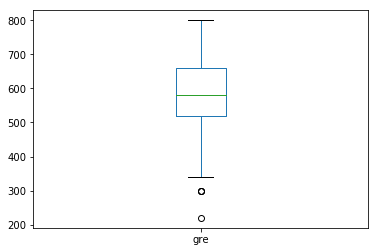

In [8]:
#boxplot 1
df_raw_clean['gre'].plot(kind='box')

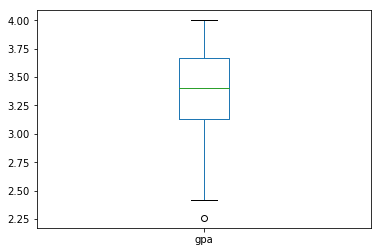

In [9]:
#boxplot 2 
df_raw_clean['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: The quartiles and median for gre and gpa. It also identifies any outliers. 


#### Question 8. Describe each distribution 

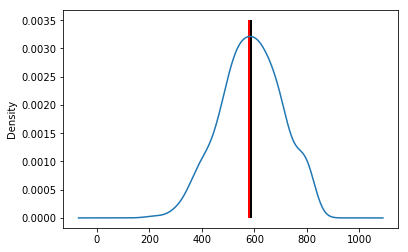

In [10]:
# plot the distribution of each variable 
df_raw_clean["gre"].plot(kind="density")

plt.vlines(df_raw_clean["gre"].mean(),     # Plot black line at gre mean
           ymin=0,
           ymax = 0.0035,
           linewidth=2.0)

plt.vlines(df_raw_clean["gre"].median(),     # Plot red line at gre median
           ymin=0,
           ymax = 0.0035,
           linewidth=2.0,
           color="red")

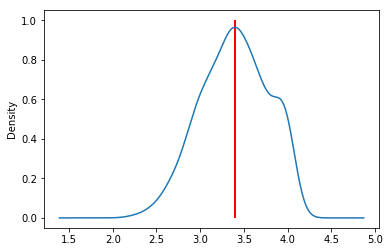

In [11]:
df_raw_clean["gpa"].plot(kind="density")

plt.vlines(df_raw_clean["gpa"].mean(),     # Plot black line at gpa mean
           ymin=0,
           ymax = 1.0,
           linewidth=2.0)

plt.vlines(df_raw_clean["gpa"].median(),     # Plot red line at gpa median
           ymin=0,
           ymax = 1.0,
           linewidth=2.0,
           color="red")

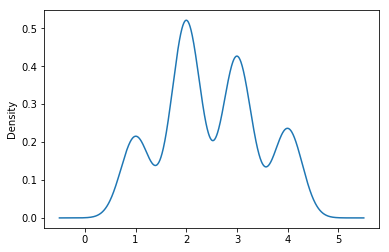

In [12]:
df_raw_clean["prestige"].plot(kind="density")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Yes, both GRE and GPA are normal. The mean and median are both in the middle of the distribution

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: We removed the NaN values, so that was the only correction needed.

#### Question 11. Which of our variables are potentially colinear? 

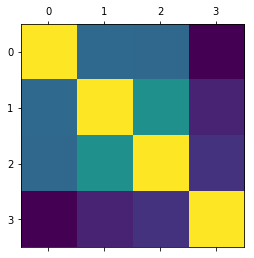

In [13]:
# create a correlation matrix for the data
plt.matshow(df_raw_clean.corr())

# 0 = admit
# 1 = gre
# 2 = gpa
# 3 = prestige

#### Question 12. What did you find?

Answer: It looks as if GRE and GPA are potentially colinear (the teal squares).
0 = admit, 1 = gre, 2 = gpa, 3 = prestige

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I would want to run a regression analysis to see if there is a correlation between if a student was admitted or not against their prestige rating. However, due to the fact that the presitge is only 1-5 I don't believe I can move forward with regression. I would then want to look at the two datasets (admit and prestige) and see if the p-value is less than 0.05 to say with 95% confidence that grad school admissions rates and prestige of undergraduate schools are associated.

#### Question 14. What is your hypothesis? 

Answer: My null hypothesis would be that grad school admissions rates and prestige of undergraduate schools are not associated. My alternate hypothesis would be that they are associated.


## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?